In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import itertools

In [2]:
%matplotlib inline


In [3]:
df = pd.read_csv("car_data.csv")

In [4]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


# Task pt. 1

In [5]:
mileage = df[["Mileage"]]
price = df[["Price"]]

In [6]:
mileage.head()

,Mileage
0,8221
1,9135
2,13196
3,16342
4,19832


In [7]:
regr = linear_model.LinearRegression()
regr.fit(mileage, price) 



print(regr.coef_, regr.intercept_)

# the score
print(regr.score(mileage, price))


[[-0.1725205]] [ 24764.55900606]
0.0204634473235


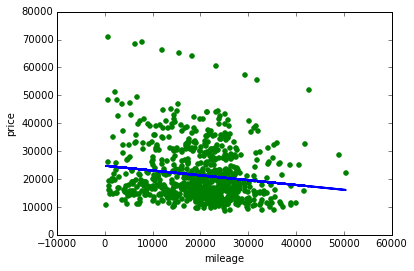

In [8]:
plt.scatter(mileage, price, color='green')
plt.plot(mileage, regr.predict(mileage), linewidth=2)
plt.xlabel('mileage')
plt.ylabel('price')
plt.show()

In [9]:
print("Score value = {}".format(regr.score(mileage, price)))
print("This is a poor fit")


Score value = 0.02046344732348948
This is a poor fit


# Task pt. 2

In [10]:
car_data = df[["Mileage", "Cylinder", "Liter", "Doors", "Cruise", "Sound", "Leather"]] 
                

In [11]:
car_data.head()

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,8221,6,3.1,4,1,1,1
1,9135,6,3.1,4,1,1,0
2,13196,6,3.1,4,1,1,0
3,16342,6,3.1,4,1,0,0
4,19832,6,3.1,4,1,0,1


In [12]:
price = df[["Price"]]
regr2 = linear_model.LinearRegression()
regr2.fit(car_data, price)
print("Score = {}".format(regr2.score(car_data, price)))
print("This is a poor fit")

Score = 0.4462643536728379
This is a poor fit


In [13]:
import itertools

data_columns = ["Mileage", "Cylinder", "Liter", "Doors", "Cruise", "Sound", "Leather"]

In [14]:
combos = []
for x in range(1, len(data_columns)):
    combos.append(list(itertools.combinations(data_columns, x)))
    
inputs = []
output = df[['Price']]

for x in combos:
    for y in x:
        if len(y) == 0:
            continue
        inputs.append(list(y))
results = []

for x in inputs:
    input_data = df[x]
    regr3 = linear_model.LinearRegression()
    regr3.fit(input_data, output)
#    print(', '.join(x), regr.score(input_data, output_data))
    results.append([', '.join(x), regr3.score(input_data, output)])
    
results = pd.DataFrame(results, columns=('Grouping', 'Score'))
results.sort_index(by='Score', ascending=[False])
    

,Grouping,Score
123,"Mileage, Cylinder, Doors, Cruise, Sound, Leather",0.445691
120,"Mileage, Cylinder, Liter, Doors, Cruise, Leather",0.437806
105,"Mileage, Cylinder, Doors, Cruise, Leather",0.436940
122,"Mileage, Cylinder, Liter, Cruise, Sound, Leather",0.430141
107,"Mileage, Cylinder, Cruise, Sound, Leather",0.430018
125,"Cylinder, Liter, Doors, Cruise, Sound, Leather",0.426535
117,"Cylinder, Doors, Cruise, Sound, Leather",0.425768
124,"Mileage, Liter, Doors, Cruise, Sound, Leather",0.424828
119,"Mileage, Cylinder, Liter, Doors, Cruise, Sound",0.424418
104,"Mileage, Cylinder, Doors, Cruise, Sound",0.424097


# Task pt. 3

In [15]:
make = pd.get_dummies(df["Make"])
model = pd.get_dummies(df["Model"])
typ = pd.get_dummies(df["Type"])

In [16]:
data = df[data_columns].join(make)
data = data.join(model)
data = data.join(typ)

In [17]:
data.head()

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevrolet,...,STS-V6,STS-V8,Sunfire,Vibe,XLR-V8,Convertible,Coupe,Hatchback,Sedan,Wagon
0,8221,6,3.1,4,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,9135,6,3.1,4,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,13196,6,3.1,4,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,16342,6,3.1,4,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,19832,6,3.1,4,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
regr3.fit(data, price)
score = regr3.score(data, price)
print(score)

0.980476870245


## Dummie variables increased the score...